In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


store_rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'competitor_discounts')
discount_rate = ctrl.Consequent(np.arange(0, 70.1, 0.1), 'discount_rate')

store_rating['low'] = fuzz.trimf(store_rating.universe, [0, 0, 4])
store_rating['medium'] = fuzz.trimf(store_rating.universe, [3.9, 4.2, 4.6])
store_rating['high'] = fuzz.trimf(store_rating.universe, [4.5, 5, 5])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 0, 5])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [4, 6, 8])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [7, 10, 10])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 5])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [4, 6, 8])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [7, 10, 10])

seasonal_event['none'] = fuzz.trimf(seasonal_event.universe, [0, 0, 1])
seasonal_event['moderate'] = fuzz.trimf(seasonal_event.universe, [1, 2, 3])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [2, 4, 5])

competitor_discounts['low'] = fuzz.trimf(competitor_discounts.universe, [0, 0, 5])
competitor_discounts['medium'] = fuzz.trimf(competitor_discounts.universe, [4, 6, 8])
competitor_discounts['high'] = fuzz.trimf(competitor_discounts.universe, [7, 9, 10])

discount_rate['very_low'] = fuzz.trimf(discount_rate.universe, [0, 0, 5])
discount_rate['low'] = fuzz.trimf(discount_rate.universe, [4, 8, 10])
discount_rate['medium'] = fuzz.trimf(discount_rate.universe, [9, 15, 20])
discount_rate['high'] = fuzz.trimf(discount_rate.universe, [19, 25, 40])
discount_rate['very_high'] = fuzz.trimf(discount_rate.universe, [39, 70, 70])

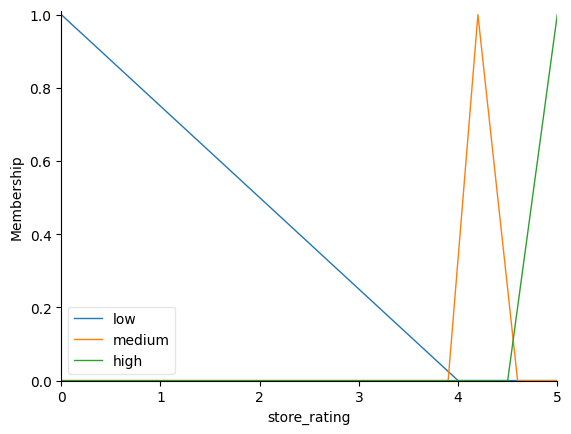

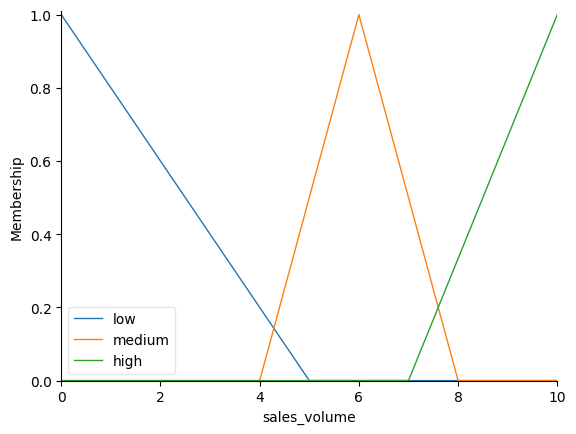

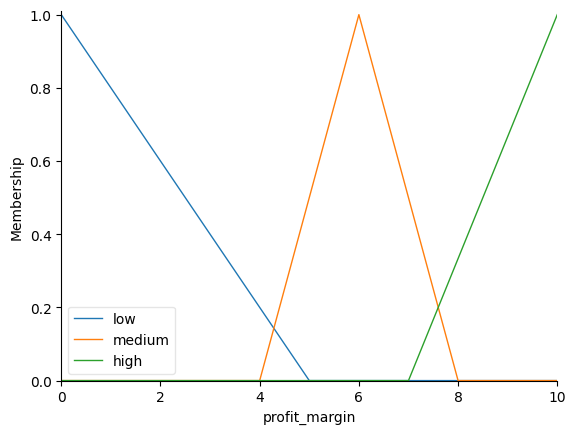

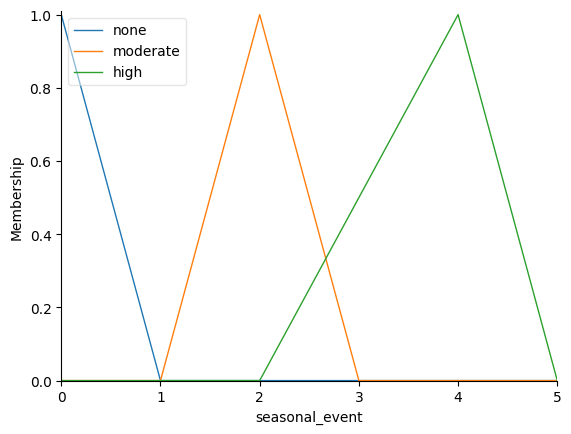

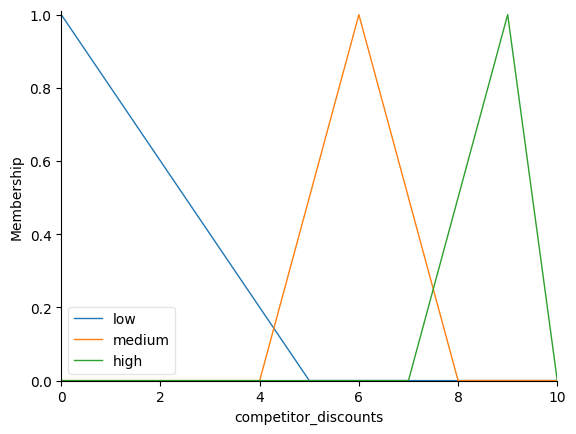

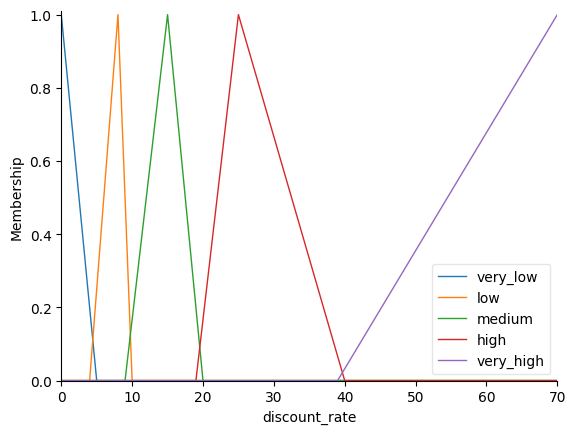

In [5]:
store_rating.view()
sales_volume.view()
profit_margin.view()
seasonal_event.view()
competitor_discounts.view()
discount_rate.view()

In [3]:
rules = [
    ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount_rate['very_low']),
    ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount_rate['high']),
    ctrl.Rule(seasonal_event['high'] & competitor_discounts['high'], discount_rate['very_high']),
    ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount_rate['medium']),
    ctrl.Rule(competitor_discounts['low'] & profit_margin['low'] & sales_volume['high'], discount_rate['very_low']),
    ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount_rate['medium']),
    ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount_rate['very_high'])
]

Phần trăm chiết khấu: 57.94444444444442
Tỷ lệ giảm giá: Very High


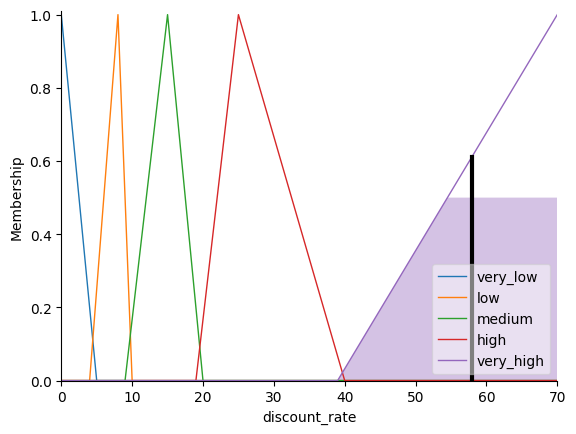

In [4]:
Fuzzy_control = ctrl.ControlSystem(rules)
Fuzzy_simulation = ctrl.ControlSystemSimulation(Fuzzy_control)
Fuzzy_simulation.input['store_rating'] = 4.3
Fuzzy_simulation.input['sales_volume'] = 7
Fuzzy_simulation.input['profit_margin'] = 1
Fuzzy_simulation.input['seasonal_event'] = 3
Fuzzy_simulation.input['competitor_discounts'] = 8
Fuzzy_simulation.compute()
discount_rate.view(sim=Fuzzy_simulation)
print(f"Phần trăm chiết khấu: {Fuzzy_simulation.output['discount_rate']}")
def get_discount_rate(rate):
    if rate < 5:
        return "Very Low"
    elif rate < 10:
        return "Low"
    elif rate < 20:
        return "Medium"
    elif rate < 40:
        return "High"
    else:
        return "Very High"
print(f"Tỷ lệ giảm giá: {get_discount_rate(Fuzzy_simulation.output['discount_rate'])}")
